<a href="https://www.kaggle.com/code/zlimshady/tokoyo-2021-olympics-game?scriptVersionId=128690572" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx
/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx
/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx
/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx
/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
athlete_df = pd.read_excel("/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx")
coach_df = pd.read_excel("/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx")
gender_df = pd.read_excel("/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx")
medal_df = pd.read_excel("/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx")
team_df = pd.read_excel("/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx")

/opt/conda/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
athlete_df.head(10)

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
5,ABALO Luc,France,Handball
6,ABAROA Cesar,Chile,Rowing
7,ABASS Abobakr,Sudan,Swimming
8,ABBASALI Hamideh,Islamic Republic of Iran,Karate
9,ABBASOV Islam,Azerbaijan,Wrestling


In [6]:
athlete_df.tail(10)

,Name,NOC,Discipline
11075,ZUKHUROV Siyovush,Tajikistan,Boxing
11076,ZULU Onthatile,South Africa,Hockey
11077,ZVARA Ondrej,Czech Republic,Equestrian
11078,ZVEREV Alexander,Germany,Tennis
11079,ZWETSLOOT Roos,Netherlands,Skateboarding
11080,ZWICKER Martin Detlef,Germany,Hockey
11081,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11082,ZYKOVA Yulia,ROC,Shooting
11083,ZYUZINA Ekaterina,ROC,Sailing
11084,ZYZANSKA Sylwia,Poland,Archery


# Data Cleaning

In [7]:
#We can view some basic information about the data frame using the .info method.

athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


In [8]:
#It appears that each column contains values of a specific data type.You can view statistical information for numerical columns (mean, standard deviation, minimum/maximum values, and the number of non-empty values) using the .describe method.

athlete_df.describe()

,Name,NOC,Discipline
count,11085,11085,11085
unique,11062,206,46
top,CHEN Yang,United States of America,Athletics
freq,2,615,2068


In [9]:
#The columns property contains the list of columns within the data frame.

athlete_df.columns

Index(['Name', 'NOC', 'Discipline'], dtype='object')

In [10]:
#You can also retrieve the number of rows and columns in the data frame using the .shape property

athlete_df.shape

(11085, 3)

In [11]:
#checking for missing values

athlete_df.isnull().sum()*100/len(athlete_df)

Name          0.0
NOC           0.0
Discipline    0.0
dtype: float64

# **DATA ANALYSIS QUESTIONS**

1. Which countries do most athletes come from?

In [12]:
athlete_df.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


countries_group = athlete_df.groupby('NOC')
countries = [NOC for NOC, athlete_df in countries_group]

We'll use value_counts to get a sorted order of values so we can use a fixed number of values to demonstrate which countries most players come from.
Using all the countries would make the chart too clustered. 

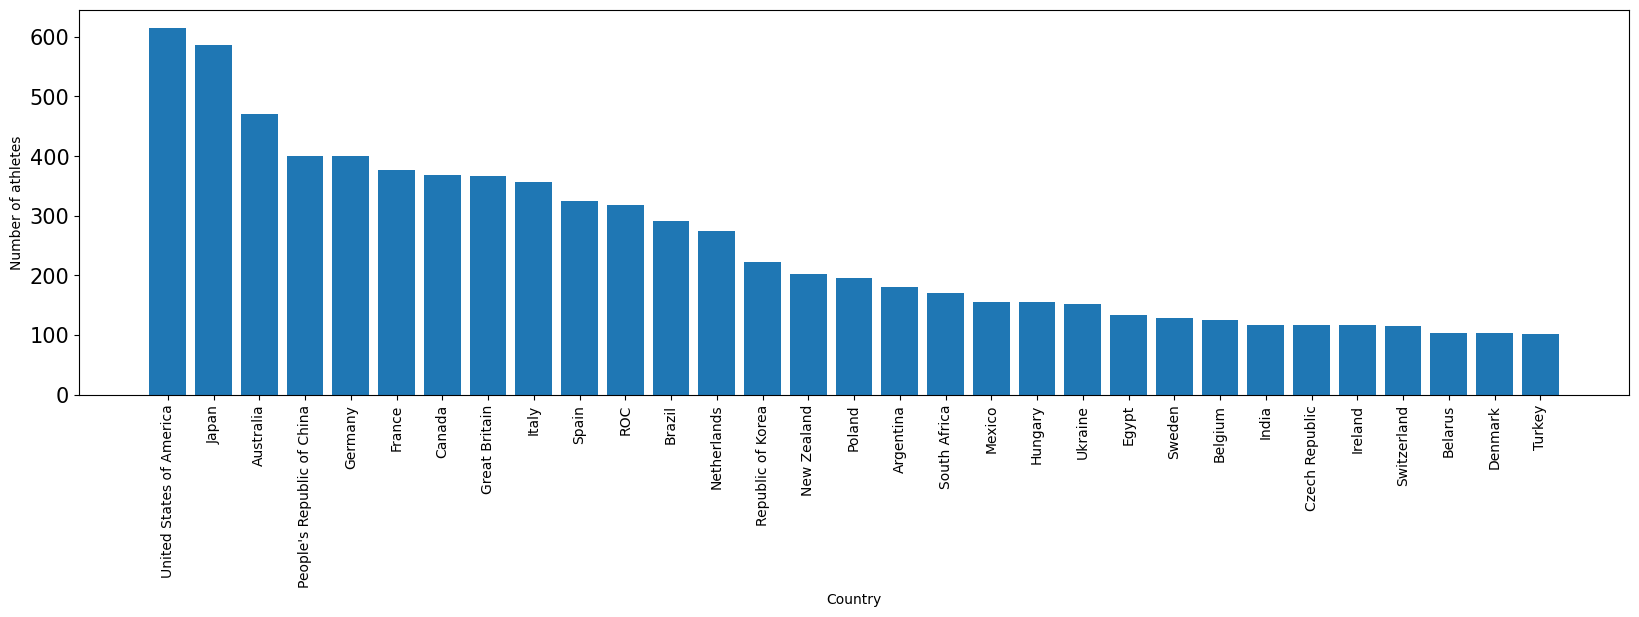

In [13]:
y = athlete_df.NOC.value_counts().values[0:31]
x = athlete_df.NOC.value_counts().index[0:31]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.xlabel("Country")
plt.ylabel("Number of athletes")
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=15)
plt.show()

In [14]:
athlete_df.NOC.value_counts()

United States of America       615
Japan                          586
Australia                      470
People's Republic of China     401
Germany                        400
                              ... 
United Republic of Tanzania      2
Saint Kitts and Nevis            2
Marshall Islands                 2
Vanuatu                          2
South Sudan                      2
Name: NOC, Length: 206, dtype: int64

2. Which discipline is most popular and which country has the highest participants in it?

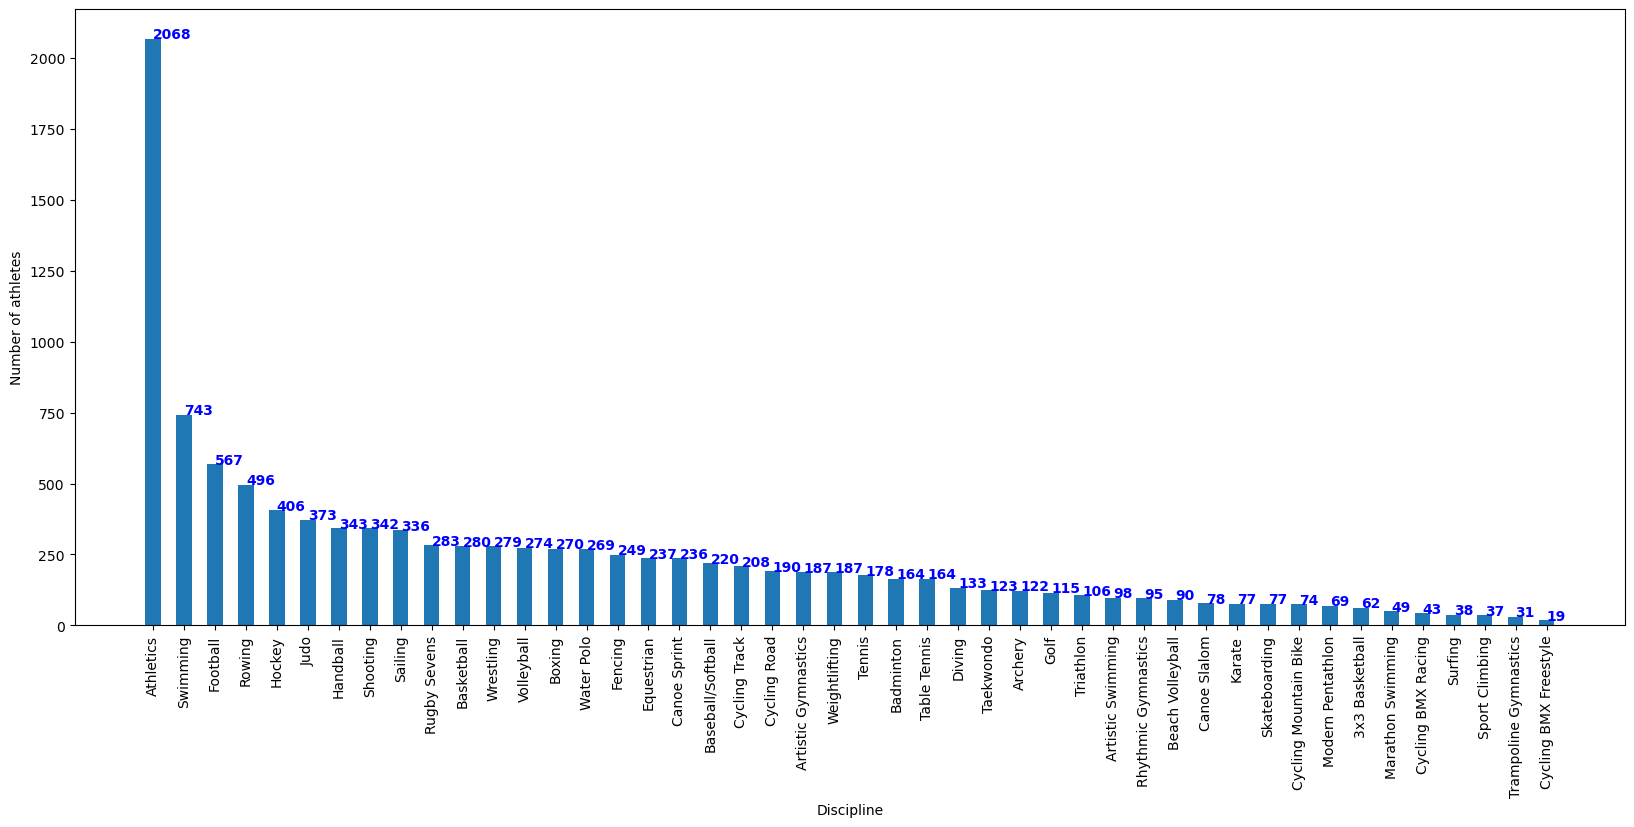

In [15]:
y = athlete_df.Discipline.value_counts().values
x = athlete_df.Discipline.value_counts().index
plt.figure(figsize=(20,8))
plt.bar(x,y,width=0.5)
for index, value in enumerate(y):
    plt.text(index, value, str(value),color='blue',size=10,fontweight='bold')
plt.xlabel("Discipline")
plt.ylabel("Number of athletes")
plt.xticks(rotation='vertical')
plt.show()

In [16]:
team_df.head(10)

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women
5,Japan,3x3 Basketball,Japan,Men
6,Japan,3x3 Basketball,Japan,Women
7,Latvia,3x3 Basketball,Latvia,Men
8,Mongolia,3x3 Basketball,Mongolia,Women
9,Netherlands,3x3 Basketball,Netherlands,Men


In [17]:
athletics_df = team_df[(team_df["Discipline"] == "Athletics")]
athletics_df["NOC"].value_counts()

United States of America      5
Germany                       5
Italy                         5
Netherlands                   5
Great Britain                 5
Jamaica                       5
Poland                        4
France                        4
Trinidad and Tobago           3
Japan                         3
Brazil                        3
Belgium                       3
Canada                        2
People's Republic of China    2
Switzerland                   2
South Africa                  2
Nigeria                       2
India                         2
Ukraine                       2
Denmark                       2
Spain                         1
Turkey                        1
Australia                     1
Ireland                       1
Bahamas                       1
Ecuador                       1
Dominican Republic            1
Czech Republic                1
Cuba                          1
Colombia                      1
Botswana                      1
Belarus 

Athletics, the most popular discipline, has most participants (5) from the United States, Netherlands, jamaica, Italy , Great Britain and Germany.

3. Which country produces highest number of coaches?

In [18]:
coach_df.head(10)

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN
5,AIKMAN Siegfried Gottlieb,Japan,Hockey,Men
6,AL SAADI Kais,Germany,Hockey,Men
7,ALAMEDA Lonni,Canada,Baseball/Softball,Softball
8,ALEKNO Vladimir,Islamic Republic of Iran,Volleyball,Men
9,ALEKSEEV Alexey,ROC,Handball,Women


In [19]:
coach_df.NOC.value_counts()

Japan                       35
United States of America    28
Spain                       28
Australia                   22
Canada                      16
                            ..
Portugal                     1
Belarus                      1
Slovakia                     1
Croatia                      1
Liechtenstein                1
Name: NOC, Length: 61, dtype: int64

4. Gender across disciplines.

In [20]:
gender_df.head(10)

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041
5,Badminton,86,87,173
6,Baseball/Softball,90,144,234
7,Basketball,144,144,288
8,Beach Volleyball,48,48,96
9,Boxing,102,187,289


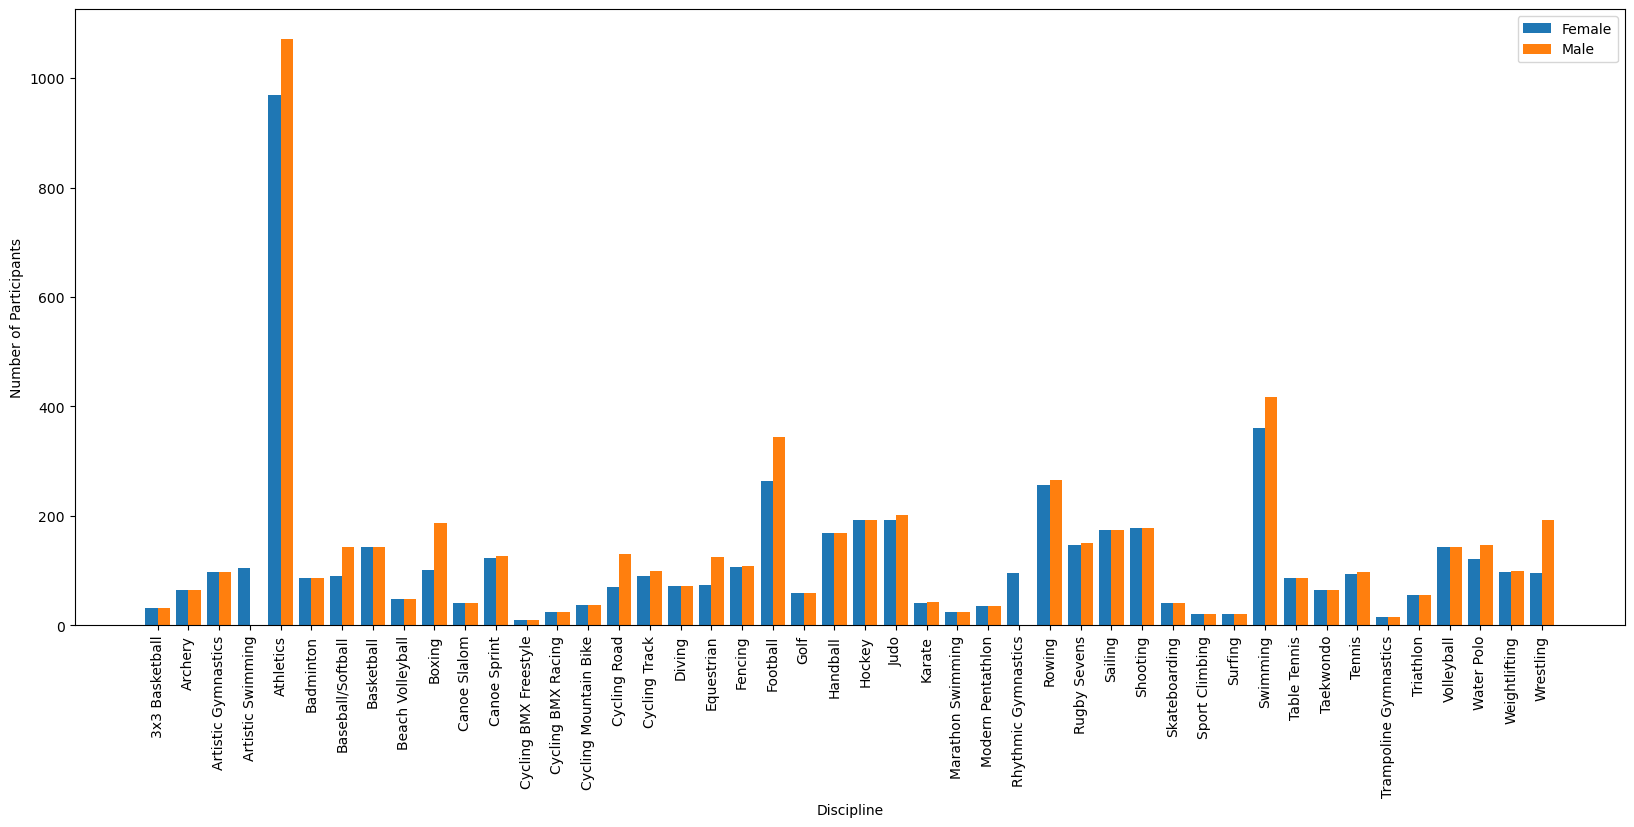

In [21]:
Disc = gender_df.groupby('Discipline')
x = [Discipline for Discipline, df in Disc]
female = gender_df.Female
male = gender_df.Male
plt.figure(figsize=(20,8))
X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, female, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, male, 0.4, label = 'Male')
plt.xlabel("Discipline",size=10)
plt.ylabel("Number of Participants")
plt.xticks(X_axis,x,rotation='vertical')
plt.legend()
plt.show()

5. Which country recieved most gold medals? Which recieved most silver and most bronze? Which received least for each?

In [22]:
medal_df.head(10)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


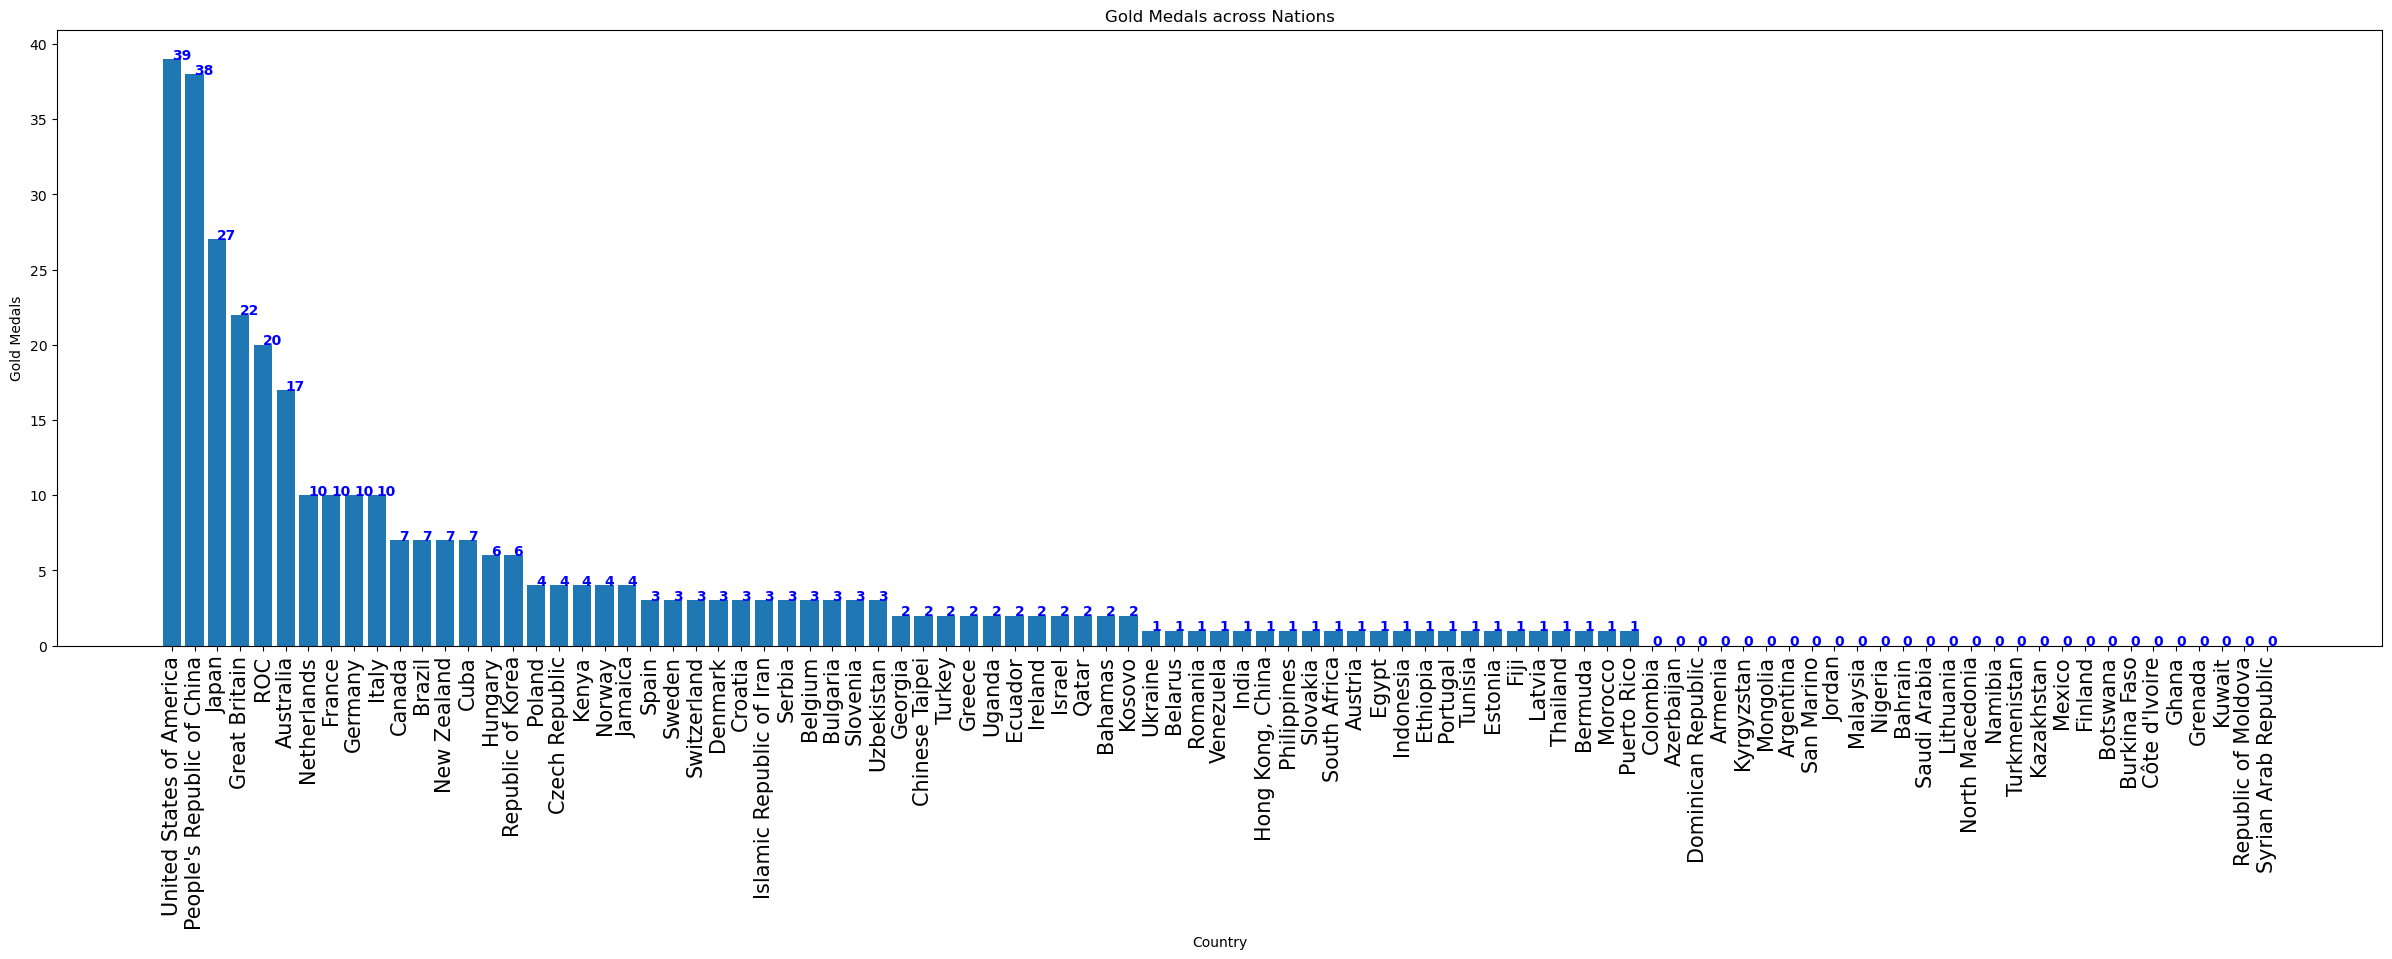

In [23]:
medal_df.rename(columns={'Team/NOC':'Team'},inplace=True) # renaming the Team/NOC column to Team
x = []
for team in medal_df.Team:
    x.append(team)
y = medal_df.Gold
plt.figure(figsize=(30,8))
plt.bar(x,y)
for index, value in enumerate(y):
    plt.text(index, value, str(value),color='blue',size=10,fontweight='bold')
plt.xlabel("Country",size=10)
plt.ylabel("Gold Medals")
plt.xticks(x,rotation='vertical',size=15)
plt.title("Gold Medals across Nations")
plt.show()

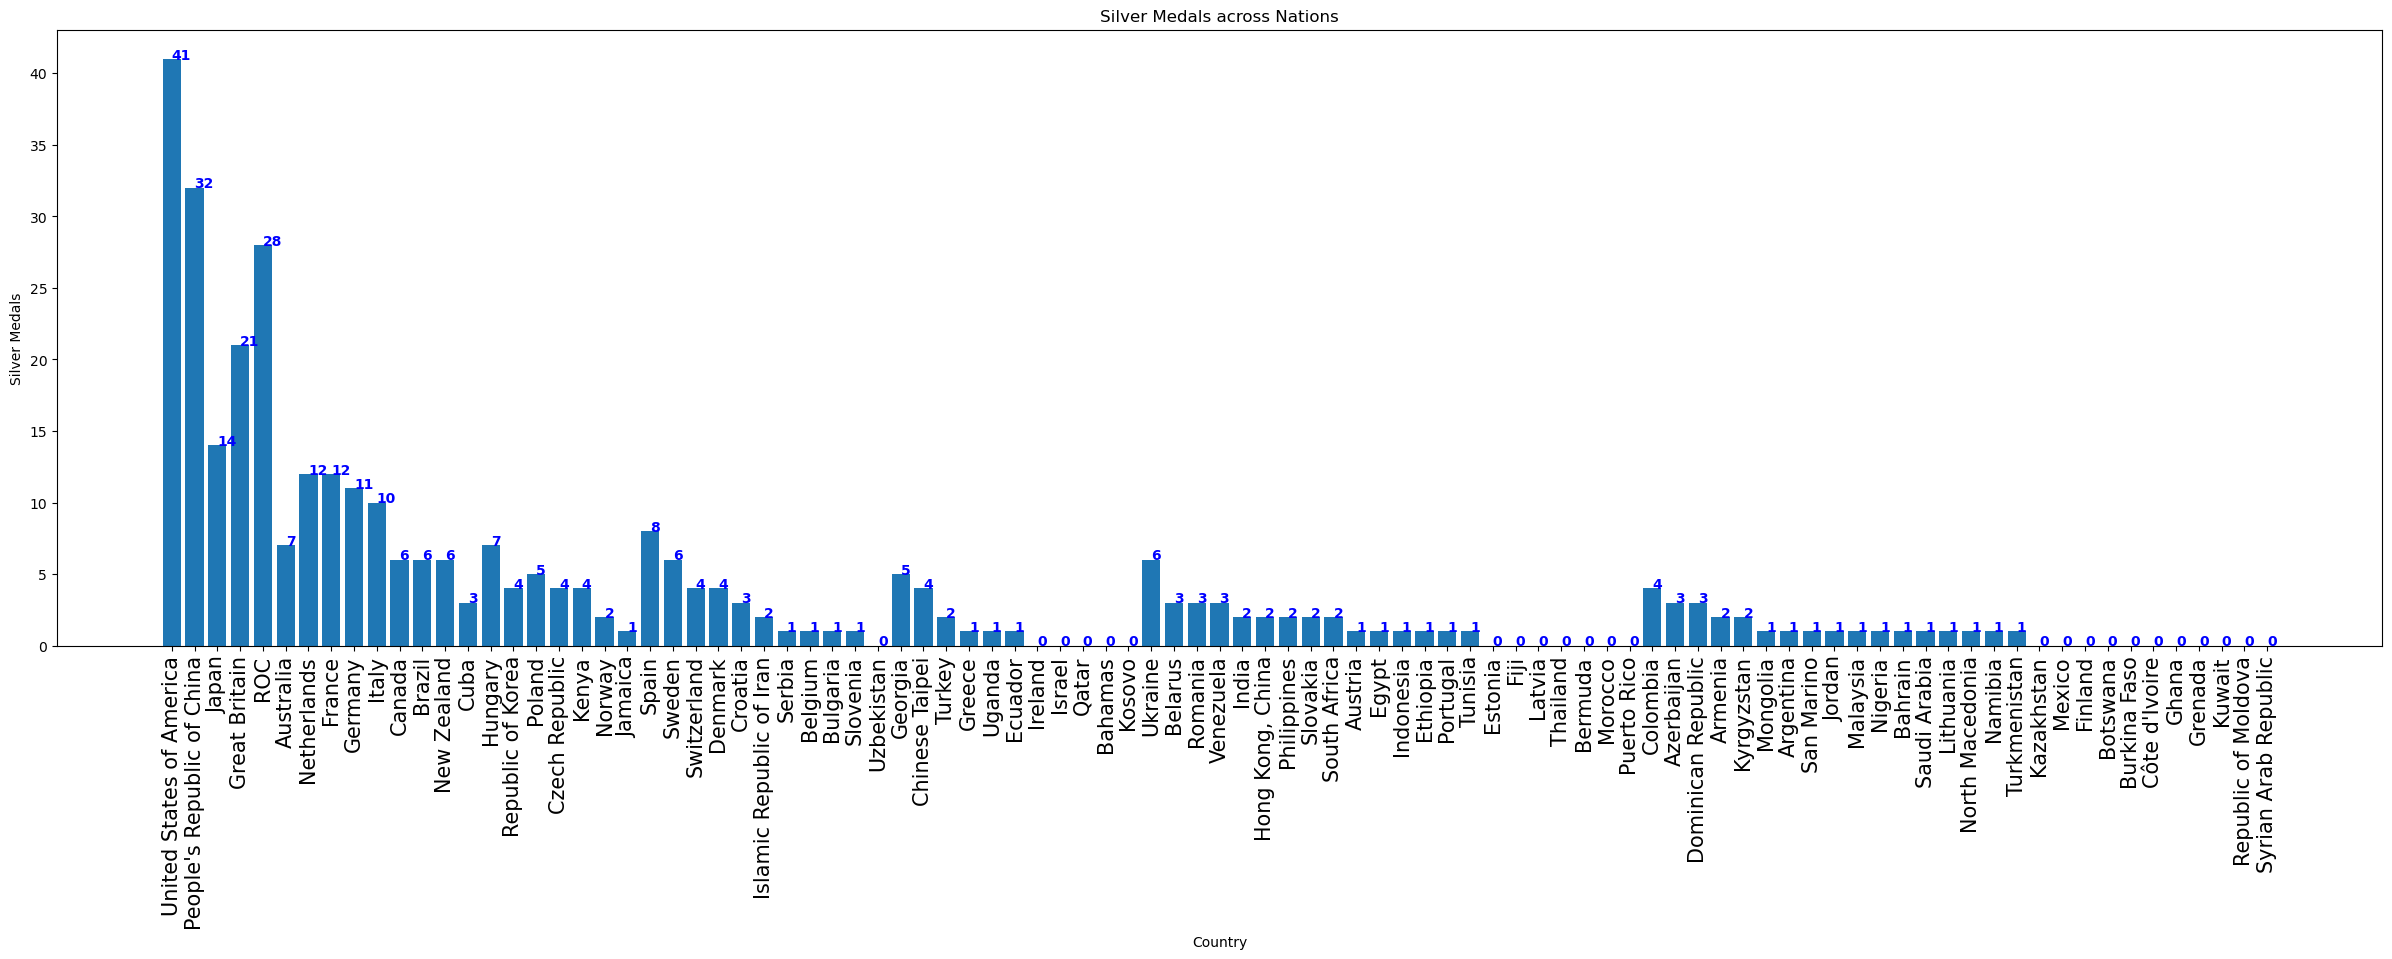

In [24]:
medal_df.rename(columns={'Team/NOC':'Team'},inplace=True) # renaming the Team/NOC column to Team
x = []
for team in medal_df.Team:
    x.append(team)
y = medal_df.Silver
plt.figure(figsize=(30,8))
plt.bar(x,y)
for index, value in enumerate(y):
    plt.text(index, value, str(value),color='blue',size=10,fontweight='bold')
plt.xlabel("Country",size=10)
plt.ylabel("Silver Medals")
plt.xticks(x,rotation='vertical',size=15)
plt.title("Silver Medals across Nations")
plt.show()

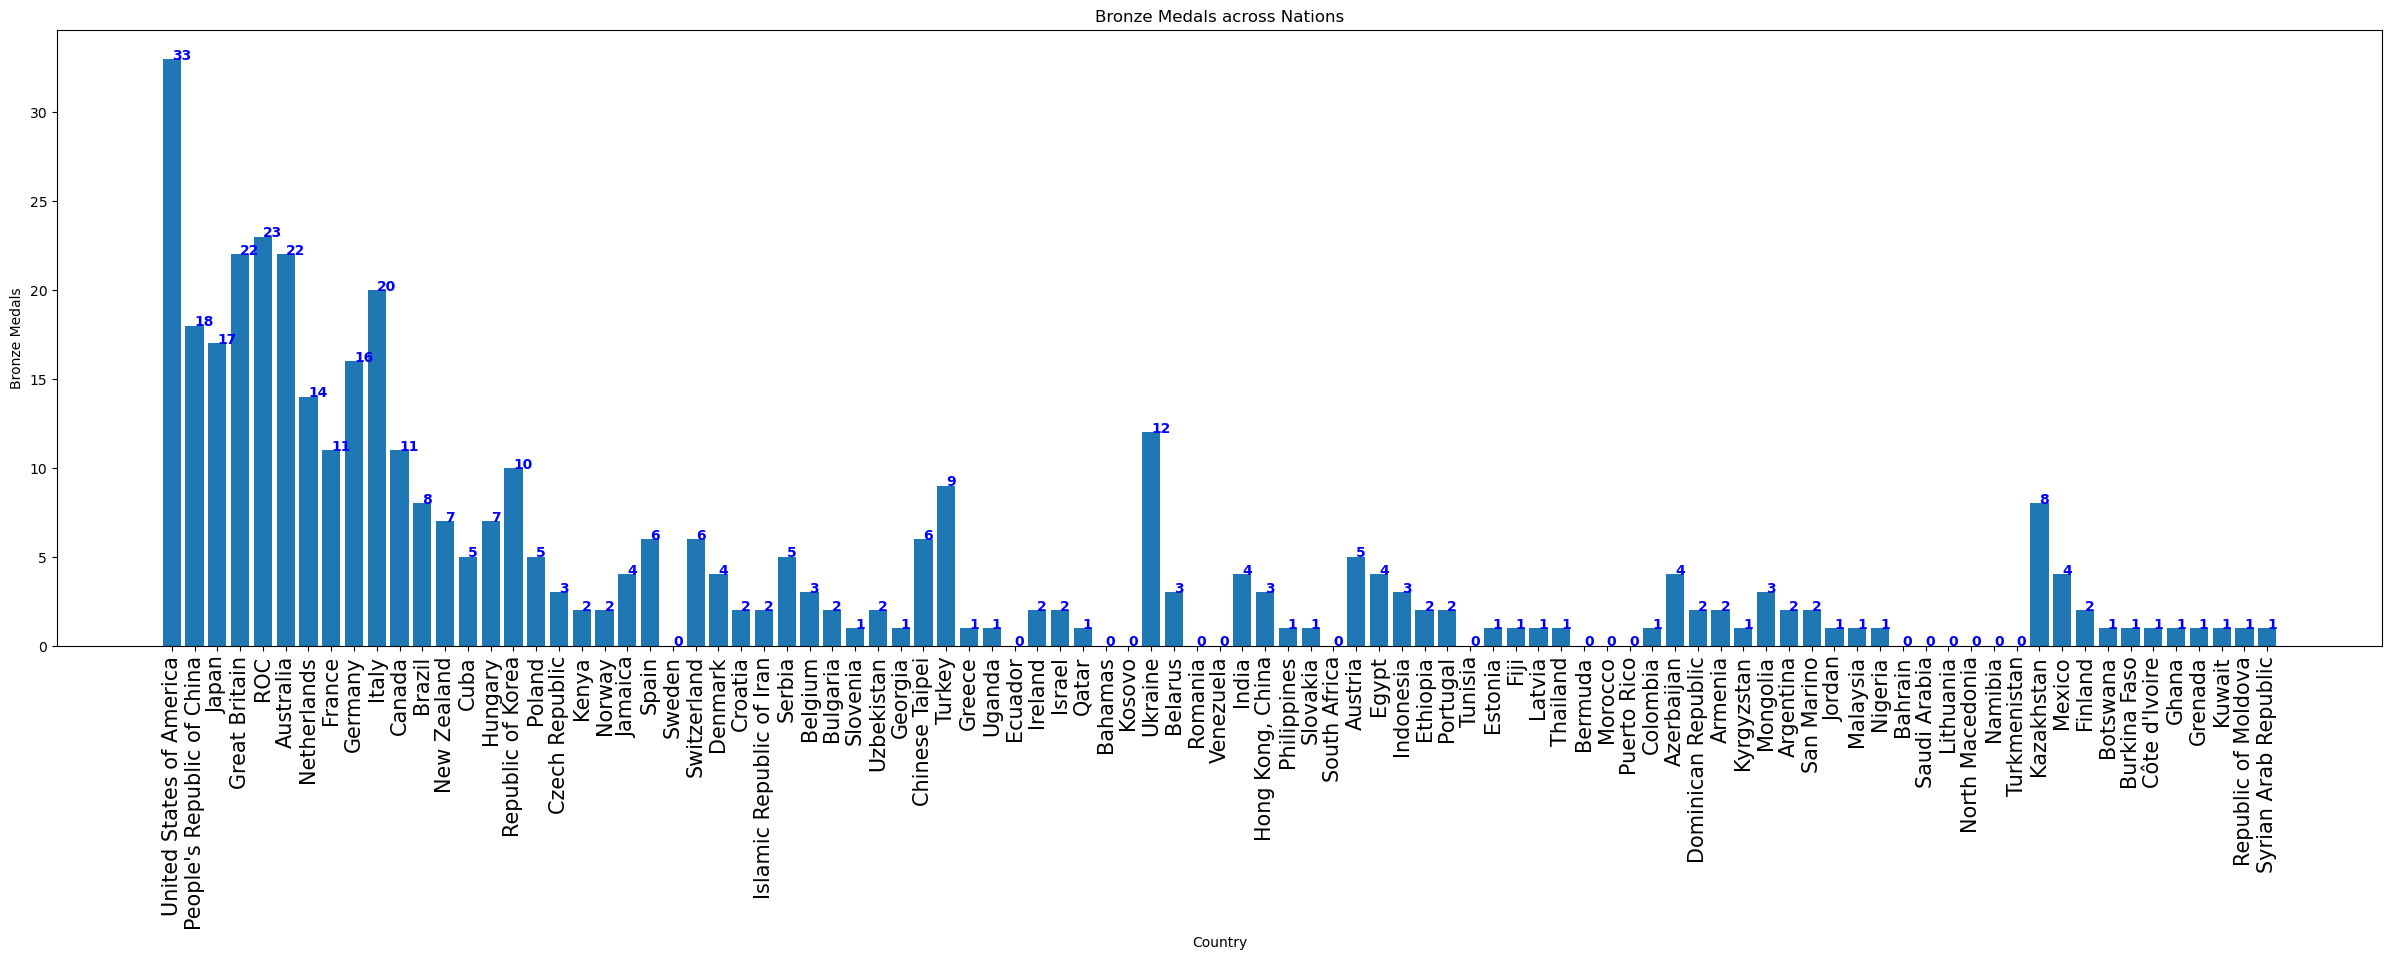

In [25]:
medal_df.rename(columns={'Team/NOC':'Team'},inplace=True) # renaming the Team/NOC column to Team
x = []
for team in medal_df.Team:
    x.append(team)
y = medal_df.Bronze
plt.figure(figsize=(30,8))
plt.bar(x,y)
for index, value in enumerate(y):
    plt.text(index, value, str(value),color='blue',size=10,fontweight='bold')
plt.xlabel("Country",size=10)
plt.ylabel("Bronze Medals")
plt.xticks(x,rotation='vertical',size=15)
plt.title("Bronze Medals across Nations")
plt.show()